In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
def data_generator(n,d):
  if d<5: 
    return 
  data = []
  for i in range(n):  
    temp = [0]                                    # first column remain for Y
    temp.append(np.random.normal(loc=3,scale=1))  #X_1
    temp.append(np.random.normal(loc=-2,scale=1)) #X_2
    temp.append(temp[1]+2*temp[2])                #X_3
    temp.append(pow(temp[2]+2,2))                 #X_4
    temp.append(np.random.binomial(1,0.8))        #X_5
    temp[0] = 4-3*pow(temp[1],2)+temp[3]-0.01*temp[4]+temp[2]*temp[5]+np.random.normal(loc=0,scale=.1)
    for i in range(d-5):                          #X_i
      temp.append(np.random.normal(loc=0,scale=1))  
    data.append(temp)
  return np.array(data)

def getError(Y):
  Loss = 0
  n = len(Y)
  Y_bar = Y.mean()
  for i in range(n):
    Loss += pow(Y[i]-Y_bar,2)
  return Loss/n


2.1

In [4]:
train = data_generator(10000,6)
test = data_generator(1000,6)
print(sum(train[:,0])/10000,sum(test[:,0])/1000)

train_error = getError(train[:,0])
test_error = getError(test[:,0])
difference = train_error - test_error
print('avg Y =',sum(train[:,0])/10000,',',sum(test[:,0])/1000,'\ntrain error',train_error,'\ntest error',test_error,'\ndiffenrece',difference)

-28.726601818994112 -28.70911602402405
avg Y = -28.726601818994112 , -28.70911602402405 
train error 322.8297838564185 
test error 301.97497045497784 
diffenrece 20.85481340144065


2.2

In [5]:
# d is number of variables
# find the X with highest correlation with Y
def getBestCorr(data,d): 
  corr = []
  corr.append(0)
  Y = data[:,0]
  for i in range(1,d):
    corr.append(abs(np.corrcoef(data[:,i],Y)[0,1]))
  return corr.index(max(corr))

# find threshold
def threshold(data,d):
  n = len(data)
  if n == 2:
    return (data[0][d]+data[1][d])/2
  temp = data[data[:,d].argsort()]
  Errors = []
  alpha = []
  for i in range(1,n-1):
    Left = temp[:i]
    Right = temp[i:]
    LeftError = Left[:,0].var()
    RightError = Right[:,0].var()
    totalError = i/n * LeftError +(1-i/n) * RightError
    alpha.append((temp[i-1][d]+temp[i][d])/2)
    Errors.append(totalError)

  Index = Errors.index(min(Errors))
  Alpha = alpha[Index]
  return Alpha

# build the tree
class Node():
  def __init__(self,d,y):
    self.d = d # X_d
    self.y = y  # return value of Y_hat or threshold
    self.left = None
    self.right = None

def decision_tree(data,d,depth):
  if depth == 0 or len(data) == 1:
    temp = Node(None,data[:,0].mean())  # Node.y is the return value for terminal nodes
    return temp
  variable = getBestCorr(data,d)        # the variable with highest corr
  alpha = threshold(data,variable)
  #alpha = data[:,variable].mean()
  root = Node(variable,alpha)           # Node.y is the threshold for other non-terminal nodes
  Leftdata = []
  Rightdata = []  
  for i in range(len(data)):
    if data[i][variable] < alpha: 
      Leftdata.append(data[i])
    else:
      Rightdata.append(data[i])
  if len(Leftdata)==0 or len(Rightdata)==0:
    return Node(None,data[:,0].mean())
  root.left = decision_tree(np.array(Leftdata),d,depth-1)
  root.right = decision_tree(np.array(Rightdata),d,depth-1)
  return root

# find the predict Y through the tree
def predict_D_Y(tree,data):
  ptr = tree
  while ptr.d != None:
    variable = ptr.d
    threshold = ptr.y
    if data[variable] < threshold:
      ptr = ptr.left
    else:
      ptr = ptr.right
  return ptr.y

# find the predict Y of the whole test table
def predict_error(test,tree):
  n = len(test)
  Loss = 0
  for i in range(n):
    Y_hat = predict_D_Y(tree,test[i])
    loss = pow(Y_hat-test[i][0],2)
    Loss += loss
  Loss = Loss/n
  return Loss

In [6]:
#generate data with d=10
Train_10=data_generator(10000,10)
Test_10=data_generator(1000,10)

#find errors
Errors_train = []
Errors_test = []
for i in range(20):
  DecisionTree = decision_tree(Train_10,10,i)
  error_train = predict_error(Train_10,DecisionTree)
  error_test = predict_error(Test_10,DecisionTree)
  print('finish tree depth =',i,' error = ',error_train,error_test)
  Errors_train.append(error_train)
  Errors_test.append(error_test)

finish tree depth = 0  error =  318.90862399548854 280.456009568031
finish tree depth = 1  error =  119.20245469216594 106.42972560583016
finish tree depth = 2  error =  42.79633182097634 38.10441200133238
finish tree depth = 3  error =  18.317823803416772 16.990723815993643
finish tree depth = 4  error =  10.337187595332198 9.993500192148597
finish tree depth = 5  error =  5.488782473757479 5.656114787642266
finish tree depth = 6  error =  3.272928816707958 3.4443066205958446


c:\Users\trisc\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\trisc\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


finish tree depth = 7  error =  1.9466292389265505 2.213733339726956
finish tree depth = 8  error =  1.1294952076299598 1.5234881807426828
finish tree depth = 9  error =  0.6385321517213219 0.9962689402203319
finish tree depth = 10  error =  0.37650309282882816 0.7531901496183854
finish tree depth = 11  error =  0.2506408259132037 0.6041130600074552
finish tree depth = 12  error =  0.19158948552736116 0.5477354523164267
finish tree depth = 13  error =  0.16426858461393776 0.5328842088024995
finish tree depth = 14  error =  0.15355110637515176 0.527169245196156
finish tree depth = 15  error =  0.14949581583358412 0.5253523405373869
finish tree depth = 16  error =  0.14831871086760143 0.5248800406975479
finish tree depth = 17  error =  0.14800441450126517 0.5245970775101482
finish tree depth = 18  error =  0.14792556078124727 0.5248455794337119
finish tree depth = 19  error =  0.14791371527016262 0.5247950359067255


[318.90862399548854, 119.20245469216594, 42.79633182097634, 18.317823803416772, 10.337187595332198, 5.488782473757479, 3.272928816707958, 1.9466292389265505, 1.1294952076299598, 0.6385321517213219, 0.37650309282882816, 0.2506408259132037, 0.19158948552736116, 0.16426858461393776, 0.15355110637515176, 0.14949581583358412, 0.14831871086760143, 0.14800441450126517, 0.14792556078124727, 0.14791371527016262]


<function matplotlib.pyplot.show(close=None, block=None)>

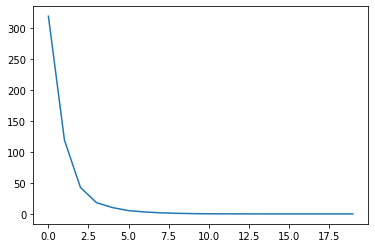

In [7]:
print(Errors_train)
plt.plot(Errors_train)
plt.show

[280.456009568031, 106.42972560583016, 38.10441200133238, 16.990723815993643, 9.993500192148597, 5.656114787642266, 3.4443066205958446, 2.213733339726956, 1.5234881807426828, 0.9962689402203319, 0.7531901496183854, 0.6041130600074552, 0.5477354523164267, 0.5328842088024995, 0.527169245196156, 0.5253523405373869, 0.5248800406975479, 0.5245970775101482, 0.5248455794337119, 0.5247950359067255]


<function matplotlib.pyplot.show(close=None, block=None)>

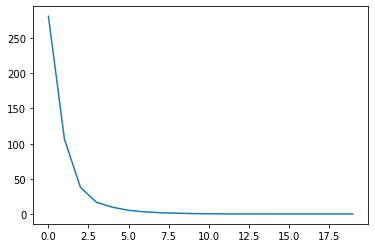

In [8]:
print(Errors_test)
plt.plot(Errors_test)
plt.show

2.3

In [11]:
def decision_tree_S(data,d,size):
  if len(data) <= size:
    temp = Node(None,data[:,0].mean())  # Node.y is the return value for terminal nodes
    return temp
  variable = getBestCorr(data,d)        # the variable with highest corr
  alpha = threshold(data,variable)
  #alpha = data[:,variable].mean()
  root = Node(variable,alpha)           # Node.y is the threshold for other non-terminal nodes
  
  Leftdata = []
  Rightdata = []  
  for i in range(len(data)):
    if data[i][variable] < alpha: 
      Leftdata.append(data[i])
    else:
      Rightdata.append(data[i])
      
  if len(Leftdata)==0 or len(Rightdata)==0:
    return Node(None,data[:,0].mean())

  root.left = decision_tree_S(np.array(Leftdata),d,size)
  root.right = decision_tree_S(np.array(Rightdata),d,size)
  return root

In [12]:
Errors_S_train = []
Errors_S_test = []
Size_S = []
i = 10000
while i>=1 :
  DecisionTree = decision_tree_S(Train_10,10,i)
  error_train = predict_error(Train_10,DecisionTree)
  error_test = predict_error(Test_10,DecisionTree)
  Errors_S_train.append(error_train)
  Errors_S_test.append(error_test)
  Size_S.append(i)
  print('finish tree size =',i,' error = ',error_train,error_test)
  i = i/2

finish tree size = 10000  error =  318.90862399548854 280.456009568031
finish tree size = 5000.0  error =  83.23891543181018 70.79754783459646
finish tree size = 2500.0  error =  32.5166875910172 29.348386674680278
finish tree size = 1250.0  error =  22.801346376006826 19.800893304528294
finish tree size = 625.0  error =  8.708724849815583 8.23846361297655
finish tree size = 312.5  error =  5.858181145799344 5.250406566452673
finish tree size = 156.25  error =  4.306355833183044 3.921148871102979
finish tree size = 78.125  error =  1.550262157486157 1.6041180400452553
finish tree size = 39.0625  error =  0.9091351314939334 1.0306940222410028
finish tree size = 19.53125  error =  0.4861370130693007 0.7067891812024855
finish tree size = 9.765625  error =  0.2874580697114247 0.5457715046441646
finish tree size = 4.8828125  error =  0.195574029708963 0.5015297664532017
finish tree size = 2.44140625  error =  0.17112451234618598 0.5194355826057107
finish tree size = 1.220703125  error =  0.

In [ ]:
print(Errors_S_train)
plt.plot(Size_S,Errors_S_train)
plt.show

In [ ]:
print(Errors_S_test)
plt.plot(Size_S,Errors_S_test)
plt.show

2.4

In [129]:
#generate data with d=10
Train_4=data_generator(10000,10)
Test_4=data_generator(1000,10)

In [138]:
Errors_train = []
Errors_test = []
for i in range(20):
  DecisionTree = decision_tree(Train_4,10,i)
  error_train = predict_error(Train_4,DecisionTree)
  error_test = predict_error(Test_4,DecisionTree)
  print('finish tree depth =',i,' error = ',error_train,error_test)
  Errors_train.append(error_train)
  Errors_test.append(error_test)

Errors_S_train = []
Errors_S_test = []
Size_S = []
i = 10000
while i>=1 :
  DecisionTree = decision_tree_S(Train_4,10,i)
  error_train = predict_error(Train_4,DecisionTree)
  error_test = predict_error(Test_4,DecisionTree)
  Errors_S_train.append(error_train)
  Errors_S_test.append(error_test)
  Size_S.append(i)
  print('finish tree size =',i,' error = ',error_train,error_test)
  i = i/2


finish tree depth = 0  error =  322.9679130841482 290.8544117655024
finish tree depth = 1  error =  119.71019311117371 106.13880779482837
finish tree depth = 2  error =  42.391150197542224 38.522527285288824
finish tree depth = 3  error =  17.866729265735287 17.243379119523325
finish tree depth = 4  error =  10.342340673597395 10.400416813984183
finish tree depth = 5  error =  5.49202713107636 5.678681760499585
finish tree depth = 6  error =  3.237664498218905 3.464831185866901


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


finish tree depth = 7  error =  1.9028511189357982 2.260246368468647
finish tree depth = 8  error =  1.12255058634081 1.4666871193128383
finish tree depth = 9  error =  0.6114175065704691 0.9741868634693198
finish tree depth = 10  error =  0.32707428931045873 0.6612865557906935
finish tree depth = 11  error =  0.1914577029970077 0.5059380484284536
finish tree depth = 12  error =  0.1289091722814568 0.44791738648813695
finish tree depth = 13  error =  0.10308836213730188 0.4342409991503472
finish tree depth = 14  error =  0.09223863279756529 0.43455532974353994
finish tree depth = 15  error =  0.088642656147368 0.43548549396034364
finish tree depth = 16  error =  0.0873485820585666 0.43596005360895507
finish tree depth = 17  error =  0.0869761204376019 0.4365097220313039
finish tree depth = 18  error =  0.08689323210534071 0.43670032371474754
finish tree depth = 19  error =  0.0868721024753329 0.4366783221443551
finish tree size = 10000  error =  322.9679130841482 290.8544117655024
fini

[322.9679130841482, 119.71019311117371, 42.391150197542224, 17.866729265735287, 10.342340673597395, 5.49202713107636, 3.237664498218905, 1.9028511189357982, 1.12255058634081, 0.6114175065704691, 0.32707428931045873, 0.1914577029970077, 0.1289091722814568, 0.10308836213730188, 0.09223863279756529, 0.088642656147368, 0.0873485820585666, 0.0869761204376019, 0.08689323210534071, 0.0868721024753329]


<function matplotlib.pyplot.show(*args, **kw)>

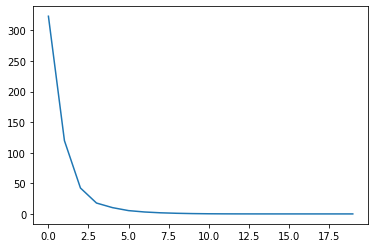

In [139]:
print(Errors_train)
plt.plot(Errors_train)
plt.show

[290.8544117655024, 106.13880779482837, 38.522527285288824, 17.243379119523325, 10.400416813984183, 5.678681760499585, 3.464831185866901, 2.260246368468647, 1.4666871193128383, 0.9741868634693198, 0.6612865557906935, 0.5059380484284536, 0.44791738648813695, 0.4342409991503472, 0.43455532974353994, 0.43548549396034364, 0.43596005360895507, 0.4365097220313039, 0.43670032371474754, 0.4366783221443551]


<function matplotlib.pyplot.show(*args, **kw)>

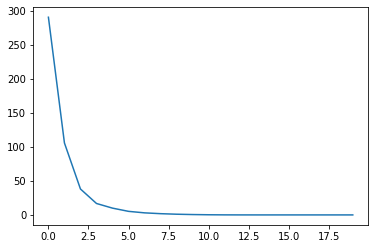

In [140]:
print(Errors_test)
plt.plot(Errors_test)
plt.show

[322.9679130841482, 82.68633714476687, 31.593335991274884, 20.920953692773168, 9.452183369822354, 6.014951331537257, 2.772783533275144, 1.689384737078708, 0.7923204979536456, 0.45067993741222306, 0.2271163913371489, 0.12673627944828553, 0.10381924003261536, 0.08686615186962587]


<function matplotlib.pyplot.show(*args, **kw)>

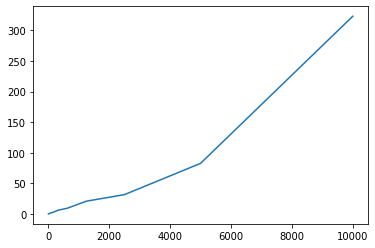

In [141]:
print(Errors_S_train)
plt.plot(Size_S,Errors_S_train)
plt.show

[290.8544117655024, 68.6315341922006, 28.18230384738387, 18.2585248445053, 8.271892665011624, 5.113722721331615, 2.7384011296103217, 1.6843280958864881, 1.0105799059349299, 0.6279840869884352, 0.4189905972883625, 0.4026291269598245, 0.4202489527260736, 0.43668934488261985]


<function matplotlib.pyplot.show(*args, **kw)>

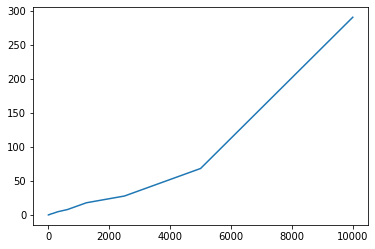

In [142]:
print(Errors_S_test)
plt.plot(Size_S,Errors_S_test)
plt.show

2.5

In [16]:
Train_50 = data_generator(10000,50) 
Test_50 = data_generator(1000,50)

start tree  0
start tree  1
start tree  2
start tree  3
start tree  4
start tree  5
start tree  6
start tree  7


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


start tree  8
start tree  9
start tree  10
start tree  11
start tree  12
start tree  13
start tree  14
start tree  15
start tree  16
start tree  17
start tree  18
start tree  19
[325.44318487898045, 118.9927609612531, 42.32736239684722, 17.66058889219694, 10.538254535788539, 6.180730263131361, 3.812424096046052, 2.4279804242278797, 1.5962827332518037, 1.0080240228457105, 0.7603568975258406, 0.635680987574582, 0.6371769162134089, 0.6397363534905478, 0.641983918966671, 0.6385032157187066, 0.6404438641090587, 0.6406445014416458, 0.6407021410088429, 0.6406087563304776]


<function matplotlib.pyplot.show(*args, **kw)>

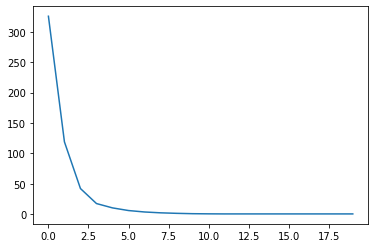

In [37]:
Errors_50 = []
for i in range(20):
  print('start tree ',i)
  DecisionTree_50 = decision_tree(Train_50,50,i)
  error = predict_error(Test_50,DecisionTree_50)
  Errors_50.append(error)
print(Errors_50)
plt.plot(Errors_50)
plt.show


[10000, 5000.0, 2500.0, 1250.0, 625.0, 312.5, 156.25, 78.125, 39.0625, 19.53125, 9.765625, 4.8828125, 2.44140625, 1.220703125] 
 [325.44318487898045, 82.84221398410469, 32.9784916463934, 22.802210280063978, 8.88766645093094, 6.351787745236559, 3.3944123126369465, 2.006766774526393, 1.0206574306914118, 0.6373242049222569, 0.49525924456935105, 0.608334037041275, 0.6127225009781279, 0.6406273044747665]


<function matplotlib.pyplot.show(*args, **kw)>

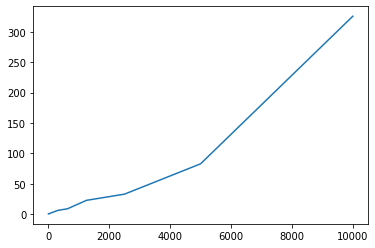

In [32]:
Errors_S_50 = []
Size_50 = []
i = 10000
while i>=1 :
  print('start tree size =',i)
  DecisionTree_50S = decision_tree_S(Train_50,50,i)
  error = predict_error(Test_50,DecisionTree_50S)
  Errors_S_50.append(error)
  Size_50.append(i)
  i = i/2

print(Errors_S_50)

print(Size_50,'\n',Errors_S_50)
plt.plot(Size_50,Errors_S_50)
plt.show

2.6

In [ ]:
def decision_tree_Sd(data,d,size):
  if len(data) <= size:
    temp = Node(None,data[:,0].mean())  # Node.y is the return value for terminal nodes
    return temp,0
  count = 0
  variable = getBestCorr(data,d)        # the variable with highest corr
  if variable >=6:
    count += 1
  alpha = threshold(data,variable)
  #alpha = data[:,variable].mean()
  root = Node(variable,alpha)           # Node.y is the threshold for other non-terminal nodes
  Leftdata = []
  Rightdata = []  
  for i in range(len(data)):
    if data[i][variable] < alpha: 
      Leftdata.append(data[i])
    else:
      Rightdata.append(data[i])
  if len(Leftdata)==0 or len(Rightdata)==0:
    return Node(None,data[:,0].mean()),count
  root.left,temp = decision_tree_Sd(np.array(Leftdata),d,size)
  count += temp
  root.right,temp = decision_tree_Sd(np.array(Rightdata),d,size)
  count += temp
  return root,count

def decision_tree_d(data,d,depth):
  if depth == 0 or len(data) == 1:
    temp = Node(None,data[:,0].mean())  # Node.y is the return value for terminal nodes
    return temp,0
  count = 0
  variable = getBestCorr(data,d)        # the variable with highest corr
  if variable >=6:
    count += 1
  alpha = threshold(data,variable)
  #alpha = data[:,variable].mean()
  root = Node(variable,alpha)           # Node.y is the threshold for other non-terminal nodes
  Leftdata = []
  Rightdata = []  
  for i in range(len(data)):
    if data[i][variable] < alpha: 
      Leftdata.append(data[i])
    else:
      Rightdata.append(data[i])
  if len(Leftdata)==0 or len(Rightdata)==0:
    return Node(None,data[:,0].mean()),count
  root.left,temp = decision_tree_d(np.array(Leftdata),d,depth-1)
  count += temp
  root.right,temp = decision_tree_d(np.array(Rightdata),d,depth-1)
  count += temp
  return root,count

count2 = []
countS2 = []
d = 5
while d <= 50: 
  print('start data d =',d)
  Train_d = data_generator(10000,d) 
  #Test_d = data_generator(1000,d)

  DecisionTree_d,count_d = decision_tree_d(Train_d,d,15)
  count2.append(count_d)

  DecisionTree_dS,count_dS = decision_tree_Sd(Train_d,d,5)
  countS2.append(count_dS)
  
  d = d+1


[0, 0, 839, 1277, 1654, 1962, 2144, 2200, 2418, 2664, 2644, 2522, 2884, 2810, 2821, 2941, 3016, 2917, 3006, 3009, 3074, 3020, 3108, 3164, 3292, 3183, 3407, 3341, 3372, 3431, 3384, 3411, 3232, 3355, 3200, 3495, 3143, 3451, 3608, 3177, 3353, 3463, 3552, 3315, 3653, 3501]
[0, 0, 185, 311, 442, 536, 565, 639, 697, 790, 869, 795, 893, 870, 892, 964, 1030, 1013, 1005, 1021, 1086, 1028, 1068, 1129, 1195, 1122, 1188, 1184, 1218, 1272, 1218, 1267, 1119, 1228, 1176, 1278, 1180, 1275, 1367, 1192, 1238, 1309, 1322, 1267, 1344, 1346]


<function matplotlib.pyplot.show(*args, **kw)>

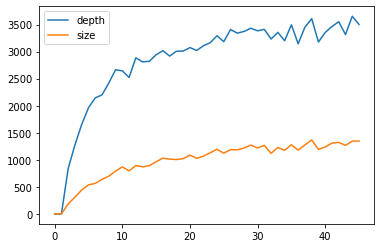

In [135]:
print(count2)
print(countS2)
plt.plot(count2)
plt.plot(countS2)
plt.legend(['depth', 'size'])
plt.show

2.7

In [16]:
# start with a mathematical guess
def intitialize_w(d): 
  
  if d < 5 :
    return error
  w = [] # w_0 is constatn, w_1 is coef of X_1
  w.append(4) 
  w.append(-9)
  w.append(0.8)
  w.append(1)
  w.append(-0.01)
  w.append(-2)
  for i in range(5,d):
    w.append(0)
  w = np.array(w)
  return w

def findGD(start,X,X_T,Y,alpha):

  current = start
  next = start-alpha*(np.matmul(np.matmul(X_T,X),start)-np.matmul(X_T,Y))

  while np.linalg.norm(next - current) > 0.0001 : 
    if isinstance(next[0], complex):
      break
    current = next
    next = current - alpha*(np.matmul(np.matmul(X_T,X),current)-np.matmul(X_T,Y))

  error =  pow(np.matmul(X,current)-Y,2).mean()
  return current,error

In [154]:
Train_7 = data_generator(10000,10)
Test_7 = data_generator(1000,10)
n = 10000
X = [ row[1:] for row in Train_7 ]
X = np.hstack((np.ones((n,1)),X))
Y = [ row[0] for row in Train_7 ]

# initializing parameters
X_T = np.transpose(X)
X_T_X = np.matmul(X_T,X)
eigenval_max = max(np.linalg.eigvals(X_T_X))
alpha = 1/(eigenval_max)
print(alpha)

w = []
w.append(intitialize_w(10))
t = 0
error = [pow(np.matmul(X,w[0])-Y,2).mean()]
for i in range(10):
  print('start = ',i)
  w0 = np.random.rand(11)

  wt,error_t = findGD(w0,X,X_T,Y,alpha)

  if error_t <= error[t]: 
    w.append(wt)
    error.append(error_t)
    t += 1

print(w[t],error[t])

X_test = [ row[1:] for row in Test_7 ]
X_test = np.hstack((np.ones((1000,1)),X_test))
Y_test = [ row[0] for row in Test_7 ]
pow(X_test.dot(w[t])-Y_test,2).mean()

5.534015994289211e-06
start =  0
start =  1
start =  2
start =  3
start =  4
start =  5
start =  6
start =  7
start =  8
start =  9
[ 2.92969000e+01 -1.48043001e+01  6.99025277e+00 -2.10674946e+00
 -6.74393657e-03 -1.99885985e+00 -1.96113514e-02  1.73551434e-03
 -4.73478603e-02  2.91860892e-02  2.01506784e-02] 18.68091096685721


17.814054895724887

In [155]:
for i in range (11):
  print(w[t][i])

29.29686922042101
-14.622756651610578
7.353327017849952
-2.2882881509562996
-0.006743268684635001
-1.9988494591631096
-0.019611401835880306
0.0017356098457102184
-0.04734800966068492
0.029186063278831012
0.020150842833630882


2.8

In [17]:
# if every element in w is larger than epsilon, terminate the loop
def Terminate(w,epsilon):
  for i in range(len(w)):
    if abs(w[i]) < epsilon:
      return 0
  return 1

#return slopes and errors  
def findbestW(X,Y,d): 
  X_T = np.transpose(X)
  X_T_X = np.matmul(X_T,X)
  eigenval_max = max(np.linalg.eigvals(X_T_X))
  alpha = 1/(eigenval_max)
  w = []
  w.append(intitialize_w(d))
  t = 0
  error = [pow(np.matmul(X,w[0])-Y,2).mean()]
  for i in range(10):
    w0 = np.random.rand(d+1)
    wt,error_t = findGD(w0,X,X_T,Y,alpha)
    if error_t <= error[t]: 
      w.append(wt)
      error.append(error_t)
      t += 1
  return w[t],error[t]
  

In [22]:
Train_8 = data_generator(10000,50)
Test_8 = data_generator(1000,50)
X = [ row[1:] for row in Train_8 ]
X = np.hstack((np.ones((10000,1)),X))
Y = [ row[0] for row in Train_8 ]
X_test = [ row[1:] for row in Test_8 ]
X_test = np.hstack((np.ones((1000,1)),X_test))
Y_test = [ row[0] for row in Test_8 ]

epsilon = 0
Epsilon = []
Loss = []
count = []
for i in range(10): 
  epsilon += 0.001

  w_best,error = findbestW(X,Y,50)
  X_copy = X
  Checking = np.ones(51)
  while Terminate(w_best,epsilon) == 0:
    for j in range(51):
      if abs(w_best[j]) < epsilon and Checking[j] != 0:
        w_best[j] = 0
        X_copy[:, j] =  0
        Checking[j] = 0
    w_best,error = findbestW(X_copy,Y,50)
  temp = 0
  for j in range(51):
    if Checking[j] == 0:
      temp += 1
  Epsilon.append(epsilon)
  count.append(temp)
  Loss.append(pow(X_test.dot(w_best)-Y_test,2).mean())
  print('finish epsilon = ',epsilon)

finish epsilon =  0.001
finish epsilon =  0.002
finish epsilon =  0.003
finish epsilon =  0.004
finish epsilon =  0.005
finish epsilon =  0.006
finish epsilon =  0.007
finish epsilon =  0.008
finish epsilon =  0.009000000000000001
finish epsilon =  0.010000000000000002


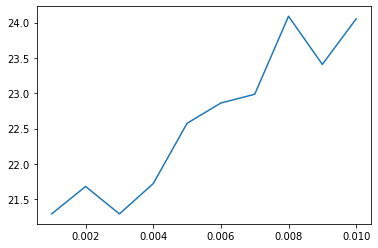

In [23]:
plt.plot(Epsilon,Loss)

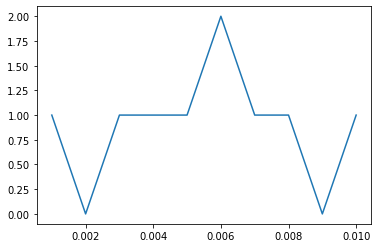

In [24]:
plt.plot(Epsilon,count)

Bonus

In [26]:
#for new matrix X, return in format of [X_0,X_1,...,X_d,X_1^2,X_1*X_2,...X_1*X_d,X_2^2,X_2*X_3,...,X_d^2]
def data_regenerate(X): # X = X_1 ~ X_d
  d = len(X[0])
  Z = []
  for i in range(len(X)):
    temp = X[i]
    for j in range(1,d):
      for k in range(j,d):
        temp = np.append(temp,X[i][j]*X[i][k])
    Z.append(temp)
  return np.array(Z)
  

In [27]:
Train_B = data_generator(10000,6)
Test_B = data_generator(1000,6)
X = [ row[1:] for row in Train_B ]
X = np.hstack((np.ones((10000,1)),X))
Z = data_regenerate(X)
Y = [ row[0] for row in Train_B ]
X_test = [ row[1:] for row in Test_B ]
X_test = np.hstack((np.ones((1000,1)),X_test))
Z_test = data_regenerate(X_test)
Y_test = [ row[0] for row in Test_B ]

Z_T = np.transpose(Z)
Z_T_Z = Z_T.dot(Z)
eigenval_max = max(np.linalg.eigvals(Z_T_Z))
alpha = 1/(eigenval_max)
d = len(Z[0])
print(d)

temp = np.zeros(d)
temp[0] = 4
temp[3] = 1
temp[4] = -0.01
temp[7] = -3
temp[16] = 1

w = []
w.append(temp)
t = 0
error = [pow(np.matmul(Z,w[0])-Y,2).mean()]
for i in range(10):
  print('start = ',i)
  w0 = np.random.rand(d)
  #print('w0 = ',w0)
  wt,error_t = findGD(w0,Z,Z_T,Y,alpha)
  #print('w = ',wt,' error = ',error_t)
  if error_t <= error[t]: 
    w.append(wt)
    error.append(error_t)
    t += 1

print(w[t],error[t])

pow(np.matmul(Z_test,w[t])-Y_test,2).mean()

28
start =  0
start =  1
start =  2
start =  3
start =  4
start =  5
start =  6
start =  7
start =  8
start =  9
[ 4.    0.    0.    1.   -0.01  0.    0.   -3.    0.    0.    0.    0.
  0.    0.    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.  ] 0.010082308911717101


0.010130746373522171

In [28]:
print(w)

[array([ 4.  ,  0.  ,  0.  ,  1.  , -0.01,  0.  ,  0.  , -3.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ])]
